# Credit Card Fraud Prediction

The goal of this work is to apply machine learning technique to train a predictive model on a large dataset of credit card transactions to detect potentially fraudulent credit card transactions. We will employ basic machine learning techniques, models and practices below.

This documentation is a personal learning documentation in applying ML technique and is adapted from various sources below and I claim close-to-zero originality in this work.

- [Predicting Fraud with TensorFlow](http://www.kaggle.com/code/currie32/predicting-fraud-with-tensorflow)
- [Credit Card Fraud Detection using Machine Learning & Python](http://towardsdatascience.com/credit-card-fraud-detection-using-machine-learning-python-5b098d4a8edc)

## Making sense of our data 

First, we need to import the necessary python packages for data visualization, and we will load our data and clean our data by checking for null values and duplicates. Finally, we will try to visualize the basic features of our data.

We start by loading the necessary packages for our work.

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

Next, we import the given data set.

In [2]:
data = pd.read_csv('../input/creditcardfraud/creditcard.csv')

We will explore the basic features of the data below. First, we look at the headings on the dataset.

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We look at the basic descriptions on each column on the data (mean, standard deviations, etc). Note that V1 - V28 are confidential information and are already transformed for its original form.

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We next look at the transaction distribution. 

In [5]:
Total_transaction = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraudulent_percentage = round(fraudulent*100/Total_transaction, 2)
print('Total number of transactions: ' + str(Total_transaction))
print('Number of normal transactions: ' + str(normal))
print('Number of fraudulent transactions: ' + str(fraudulent))
print('Percentage of fraudulent transactions: ' + str(fraudulent_percentage))

Total number of transactions: 284807
Number of normal transactions: 284315
Number of fraudulent transactions: 492
Percentage of fraudulent transactions: 0.17


Here we see that we have a highly imbalanced dataset with only 0.17% fraudulent transactions, which is expected since we don't expect our credit card to be involved in a scam/fraud every single day (otherwise many would worry about the financial security provided by financial institutions!).

Next, we check for any null value.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Good! There is no null value present in the data.

We will first look at the normal and fraudulent distributions for the 'Time' feature.

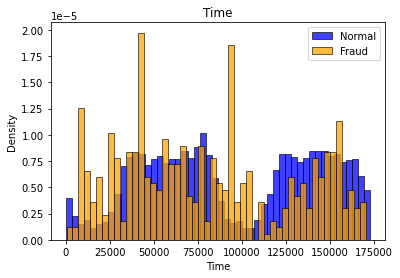

In [7]:
ax = plt.subplot()
sns.histplot(data['Time'][data.Class==0], bins=50, color="blue",stat="density")
sns.histplot(data['Time'][data.Class==1], bins=50, color="orange",stat="density")
plt.legend(["Normal", "Fraud"])
ax.set_title('Time')
             
plt.show()

Markdown and LaTeX:
It seems like time is more or less uniform across both distrubutions, and the peaks are artificial as the density of of order $10^{-5}$ for these putative 'peak', so any variation is probably meaningless and we will drop the time feature.

We will also check for duplicates (it is possible that duplicate transactions were made at slightly different times). We make a simplifying assumption that if all other identification features (meaning V1 - V28 and amount) are the same, we will count them as duplicates and remove them).

In [8]:
data.drop(['Time'], axis=1, inplace=True)
data.drop_duplicates(inplace=True)
data.shape 

(275663, 30)

Now we look at the distributions of the data for both normal and fraudulent transactions for the rest of the features. 

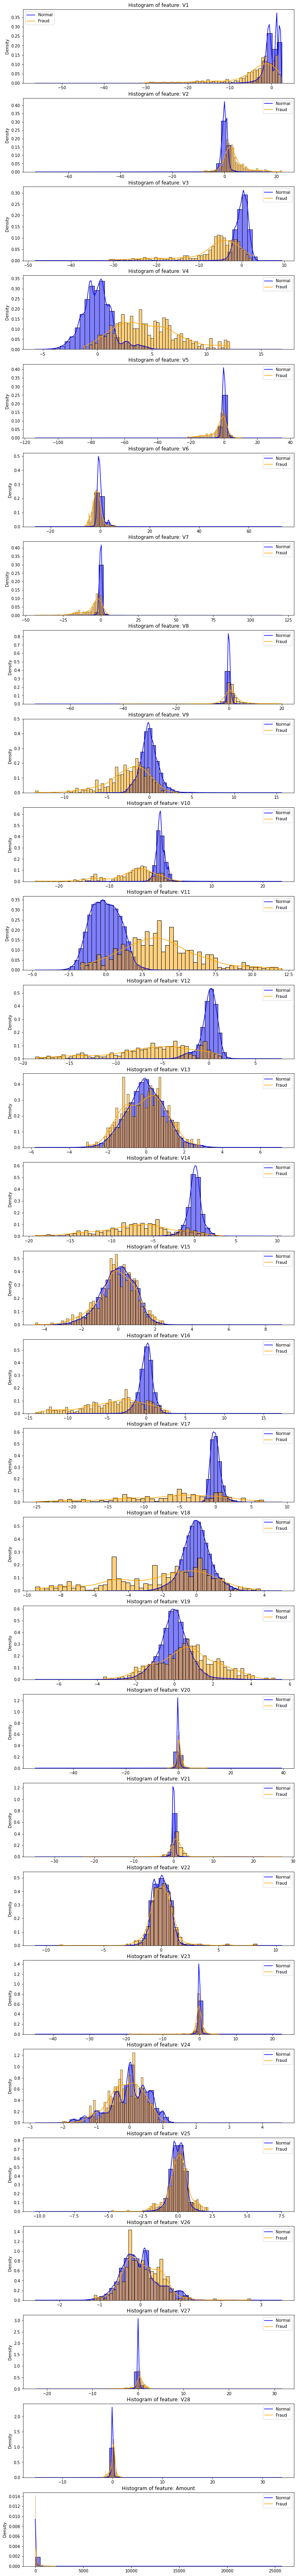

In [9]:
v_features = data.iloc[:, 0:29].columns

plt.figure(figsize=(12, 29*4))
gs = gridspec.GridSpec(29, 1)

for i, col in enumerate(data[v_features]):
    ax = plt.subplot(gs[i])
    sns.histplot(data[col][data.Class == 0], bins = 50, color="blue", stat="density", kde=True)
    sns.histplot(data[col][data.Class == 1], bins = 50, color="orange", stat="density", kde=True)
    plt.legend(["Normal","Fraud"])
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: ' + str(col))

plt.show()

Here we notice a few features of our data.

1. The amount varies very largely (the difference between max and min), but the data is mostly skewed towards the lower end (both normal and fraudulent). So we need a way to scale this.

2. We will drop other anonymous features where normal and fraud distributions are similar (V13, V15, V20, V22 - V26, V28).

We will start by scaling the amount column and dropping less distinguishable features.

In [10]:
data.drop(['V13', 'V15', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26', 'V28'], axis = 1, inplace=True)
           
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1,1))

Now we are done cleaning and organizing (i.e., scaling) data. We will move on to training or dataset.

## Splitting the dataset for train and test set

It is a standard practice in ML to split the large dataset available to us into train dataset and test dataset. Train dataset is the dataset that is used to train our neural network architecture/model parameter, while the test dataset is not used in training our NN architecture but we apply the trained model to determine how well our model fare in terms of successfully predicting fraudulent transactions.

The standard practice for modest (i.e., large but not too large, in the ballpark of 100k - several million data points) sized dataset is to split up the train-test set into 80-20 percent. There is no hard rule in splitting the dataset and one is free to slightly alter the fractions.

In [11]:
X = data.drop(['Class'], axis=1).values
Y = data['Class'].values

input_node = X.shape[1]

X = X.astype('float32')
Y = Y.astype('float32').reshape((-1,1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

## Running the model using TensorFlow Neural Network

We will first train a neural network architecture using TensorFlow package. An advantage of the TensorFlow package is that once we build the forward propagation structure, backpropagation portion of the network can be worked out easily with very few lines of codes. 

Since this is a binary classificaton problem, we will be using neural network with stacks of logistic regressions, and each layer consists of linear function followed by RELU activation function (except the last layer, where we will use sigmoid activation function). We will choose to use Adam Optimizers for regularization.

Set number of hidden nodes in each layer with a constant ratio. We will use 4 layers with LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.

In [12]:
multiplier = 0.5
hidden_nodes1 = 25
hidden_nodes2 = round(hidden_nodes1*multiplier)
hidden_nodes3 = round(hidden_nodes2*multiplier)

Next we build the weights and biases for each layer, where we write operations between tensors and initialize variables.

In [13]:
def initialize_parameter():
    zero_initializer = tf.zeros_initializer()
    initializer = tf.keras.initializers.TruncatedNormal(stddev=0.15)

    # layer 1
    W1 = tf.Variable(initializer([hidden_nodes1, input_node], dtype=tf.float32))
    b1 = tf.Variable(zero_initializer([hidden_nodes1, 1], dtype=tf.float32))

    # layer 2
    W2 = tf.Variable(initializer([hidden_nodes2, hidden_nodes1], dtype=tf.float32))
    b2 = tf.Variable(zero_initializer([hidden_nodes2, 1], dtype=tf.float32))
                 
    # layer 3
    W3 = tf.Variable(initializer([hidden_nodes3, hidden_nodes2], dtype=tf.float32))
    b3 = tf.Variable(zero_initializer([hidden_nodes3, 1], dtype=tf.float32))
                 
    # layer 4
    W4 = tf.Variable(initializer([1, hidden_nodes3], dtype = tf.float32))
    b4 = tf.Variable(zero_initializer([1], dtype=tf.float32))
    
    return W1, b1, W2, b2, W3, b3, W4, b4

def forward_propagation(X, W1, b1, W2, b2, W3, b3, W4, b4):
    tf.cast(X, tf.float32)
    z1 = tf.math.add(tf.linalg.matmul(W1,X),b1)
    y1 = tf.keras.activations.relu(z1)
    z2 = tf.math.add(tf.linalg.matmul(W2,y1),b2)
    y2 = tf.keras.activations.relu(z2)
    z3 = tf.math.add(tf.linalg.matmul(W3,y2),b3)
    y3 = tf.keras.activations.relu(z3)
    z4 = tf.math.add(tf.linalg.matmul(W4,y3),b4)
    y4 = tf.keras.activations.sigmoid(z4)
    
    return y4

Set the hyperparameters such as number of epochs, learning rate and batch size.

In [14]:
learning_rate = 0.0005
batch_size = 2048
num_epoch = 10

n_train = Y_train.shape[0]

Next we write cost function.

In [15]:
def compute_cost(y4, Y):
    
    logits = tf.transpose(y4)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=labels))
    
    return cost

Now, we sort or data sets into batches, initialize variables, write backpropagation and choose optimizer, and run our session.

In [16]:
x_train = tf.data.Dataset.from_tensor_slices(X_train)
y_train = tf.data.Dataset.from_tensor_slices(Y_train)
x_test = tf.data.Dataset.from_tensor_slices(X_test)
y_test = tf.data.Dataset.from_tensor_slices(Y_test)

2022-09-15 15:15:20.981639: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


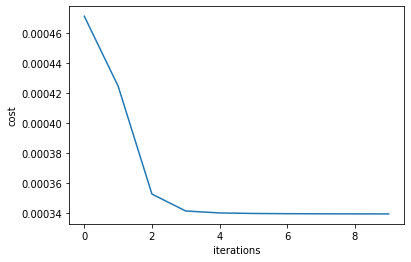

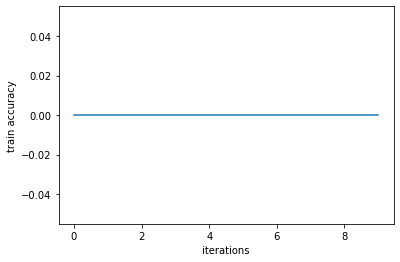

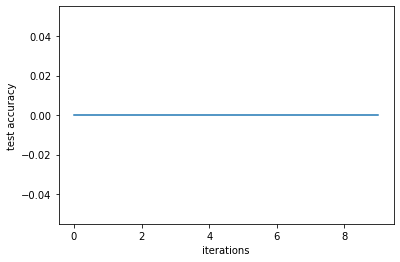

In [17]:
dataset = tf.data.Dataset.zip((x_train, y_train))
test_dataset = tf.data.Dataset.zip((x_test, y_test))

optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

test_accuracy = tf.keras.metrics.CategoricalAccuracy()
train_accuracy = tf.keras.metrics.CategoricalAccuracy()

minibatches = dataset.batch(batch_size).prefetch(8)
test_minibatches = test_dataset.batch(batch_size).prefetch(8)

costs = []
train_acc = []
test_acc = []

W1, b1, W2, b2, W3, b3, W4, b4 = initialize_parameter()
    
for epoch in range(num_epoch):
        
    epoch_cost = 0.
    train_accuracy.reset_states()
        
    for (minibatch_X, minibatch_Y) in minibatches:
        with tf.GradientTape() as tape:
            y4 = forward_propagation(tf.transpose(minibatch_X), W1, b1, W2, b2, W3, b3, W4, b4)
            tf.shape(y4)
            tf.shape(minibatch_Y)
            minibatch_cost = compute_cost(y4, tf.transpose(minibatch_Y))
                
        train_accuracy.update_state(minibatch_Y, y4)
        trainable_variables = [W1, b1, W2, b2, W3, b3, W4, b4]
        grads = tape.gradient(minibatch_cost, trainable_variables)
        optimizer.apply_gradients(zip(grads, trainable_variables))
        epoch_cost += minibatch_cost
            
    epoch_cost /= n_train
    costs.append(epoch_cost)
    train_acc.append(train_accuracy.result())
    test_acc.append(test_accuracy.result())
    test_accuracy.reset_states()
                    
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

## Comparing machine learning models using prebuilt packages

Having run or model using TensorFlow, we will also try to train different ML models on our dataset for fraud detection. This section is mostly from [Credit Card Fraud Detection using Machine Learning & Python](http://towardsdatascience.com/credit-card-fraud-detection-using-machine-learning-python-5b098d4a8edc) and I claim little to no originality. Again, this is a personal documentation for me to learn ML techniques.

We will first begin by loading and importing Python packages.

In [18]:
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### *Decision Tree*

In [19]:
DT = DecisionTreeClassifier(max_depth=4, criterion='entropy')
DT.fit(X_train, Y_train)
DT_yhat = DT.predict(X_test)

Let's check the accuracy of the decision tree model.

In [20]:
print('Accuracy score of the Decision Tree Model is {}'.format(accuracy_score(Y_test, DT_yhat)))

Accuracy score of the Decision Tree Model is 0.9992019298786571


Checking the F1 score of the decision tree model.

In [21]:
print('F1 score of the Decision Tree Model is {}'.format(f1_score(Y_test, DT_yhat)))

F1 score of the Decision Tree Model is 0.7708333333333334


Checking the confusion matrix of the decision tree model.

In [22]:
confusion_matrix(Y_test, DT_yhat, labels=[0,1])

array([[55015,    16],
       [   28,    74]])

Here we have 55015 true positive (normal classified as normal) and 16 false positives (fraud classified as normal). Out of 28 + 74 = 102 real frauds, we missed about 16% of fraudulent transactions as fraudulent using the Decision Tree model.

### *K-Nearest Neighbors*

In [23]:
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN.fit(X_train, Y_train)
KNN_yhat = KNN.predict(X_test)

Checking the accuracy, F1 score and the confusion matrix of the K-Nearest Neighbors model.

In [24]:
print('Accuracy score of the KNN model is {}'.format(accuracy_score(Y_test, KNN_yhat)))
print('F1 score of the KNN model is {}'.format(f1_score(Y_test, KNN_yhat)))
confusion_matrix(Y_test, KNN_yhat, labels = [0,1])

Accuracy score of the KNN model is 0.9993107576224766
F1 score of the KNN model is 0.8020833333333333


array([[55018,    13],
       [   25,    77]])

### *Logistic Regression*

In [25]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
LR_yhat = LR.predict(X_test)

The accuracy, F1 score and confusion matrix for using logistic regression is as following.

In [26]:
print('Accuracy score of logistic regression is {}'.format(accuracy_score(Y_test, LR_yhat)))
print('F1 score of logistic regression is {}'.format(f1_score(Y_test, LR_yhat)))
confusion_matrix(Y_test, LR_yhat, labels = [0, 1])

Accuracy score of logistic regression is 0.9989842743910181
F1 score of logistic regression is 0.6818181818181819


array([[55017,    14],
       [   42,    60]])

Here, we missed 14 cases of frauds and raised false alarm for about 42 cases of normal transactions as fraudulent.

### *Support Vector Machines*

In [27]:
svm = SVC()
svm.fit(X_train, Y_train)
svm_yhat = svm.predict(X_test)

Accuracy, F1 score, Confusion matrix below.

In [28]:
print('Accuracy score of the SVM model is {}'.format(accuracy_score(Y_test, svm_yhat)))
print('F1 score of the SVM model is {}'.format(f1_score(Y_test, svm_yhat)))
confusion_matrix(Y_test, svm_yhat, labels=[0,1])

Accuracy score of the SVM model is 0.99927448170787
F1 score of the SVM model is 0.7701149425287356


array([[55026,     5],
       [   35,    67]])

### *Random Forest*

In [29]:
RF = RandomForestClassifier(max_depth = 4)
RF.fit(X_train, Y_train)
RF_yhat = RF.predict(X_test)

Accuracy, F1 score and confusion matrix

In [30]:
print('Accuracy score of the random forest model is {}'.format(accuracy_score(Y_test, RF_yhat)))
print('F1 score of the random forest model is {}'.format(f1_score(Y_test, RF_yhat)))
confusion_matrix(Y_test, RF_yhat, labels=[0,1])

Accuracy score of the random forest model is 0.9991656539640505
F1 score of the random forest model is 0.7472527472527473


array([[55019,    12],
       [   34,    68]])

### *XGBoost*

In [31]:
XGB = XGBClassifier(max_depth = 4)
XGB.fit(X_train, Y_train)
XGB_yhat = XGB.predict(X_test)

Accuracy score, F1 score and Confusion Matrix

In [32]:
print('Accuracy score of the XGB model is {}'.format(accuracy_score(Y_test, XGB_yhat)))
print('F1 score of the XGB model is {}'.format(f1_score(Y_test, XGB_yhat)))
confusion_matrix(Y_test, XGB_yhat, labels=[0,1])

Accuracy score of the XGB model is 0.999492137195509
F1 score of the XGB model is 0.8478260869565216


array([[55027,     4],
       [   24,    78]])